In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
with open('data_scorenorm/combined_data_score_norms_v3_cont_asd.pkl', 'rb') as file:
    combined_data = pickle.load(file)

In [3]:
score_norms_abcd_val = combined_data['score_norms']['abcd-val']
score_norms_abcd_test = combined_data['score_norms']['abcd-test']
score_norms_abcd_asd = combined_data['score_norms']['abcd-asd']
score_norms_conte = combined_data['score_norms']['conte']
score_norms_ibis_typical = combined_data['score_norms']['ibis-inlier']
score_norms_ibis_hr_typical = combined_data['score_norms']['ibis-hr-inliers']
score_norms_ibis_atypical = combined_data['score_norms']['ibis-atypical']
score_norms_ibis_asd = combined_data['score_norms']['ibis-asd']
score_norms_ibis_ds = combined_data['score_norms']['ibis-ds-sa']

score_norms_abcd = np.concatenate([score_norms_abcd_val, score_norms_abcd_test], axis=0)
score_norms_abcd.shape, score_norms_ibis_typical.shape

((330, 1, 20), (82, 1, 20))

In [4]:
identifiers_abcd_val = combined_data['identifier']['abcd-val']
identifiers_abcd_test = combined_data['identifier']['abcd-test']
identifiers_abcd_asd = combined_data['identifier']['abcd-asd']
identifiers_conte = combined_data['identifier']['conte']
identifiers_ibis_typical = combined_data['identifier']['ibis-inlier']
identifiers_ibis_hr_typical = combined_data['identifier']['ibis-hr-inliers']
identifiers_ibis_atypical = combined_data['identifier']['ibis-atypical']
identifiers_ibis_asd = combined_data['identifier']['ibis-asd']
identifiers_ibis_ds = combined_data['identifier']['ibis-ds-sa']

identifiers_abcd = np.concatenate([identifiers_abcd_val, identifiers_abcd_test], axis=0)
identifiers_abcd.shape

(330,)

In [5]:
print('score_norms_abcd_val\t\t', score_norms_abcd_val.shape)
print('score_norms_abcd_test\t\t', score_norms_abcd_test.shape)
print('score_norms_abcd\t\t', score_norms_abcd.shape)
print('score_norms_abcd_asd\t\t', score_norms_abcd_asd.shape)
print('score_norms_conte\t\t', score_norms_conte.shape)
print('score_norms_ibis_typical\t', score_norms_ibis_typical.shape)
print('score_norms_ibis_hr_typical\t', score_norms_ibis_hr_typical.shape)
print('score_norms_ibis_atypical\t', score_norms_ibis_atypical.shape)
print('score_norms_ibis_asd\t\t', score_norms_ibis_asd.shape)
print('score_norms_ibis_ds\t\t', score_norms_ibis_ds.shape)

score_norms_abcd_val		 (165, 1, 20)
score_norms_abcd_test		 (165, 1, 20)
score_norms_abcd		 (330, 1, 20)
score_norms_abcd_asd		 (161, 1, 20)
score_norms_conte		 (444, 1, 20)
score_norms_ibis_typical	 (82, 1, 20)
score_norms_ibis_hr_typical	 (106, 1, 20)
score_norms_ibis_atypical	 (38, 1, 20)
score_norms_ibis_asd		 (65, 1, 20)
score_norms_ibis_ds		 (28, 1, 20)


In [6]:
score_norms_abcd_val = np.squeeze(score_norms_abcd_val)
score_norms_abcd_test = np.squeeze(score_norms_abcd_test)
score_norms_abcd = np.squeeze(score_norms_abcd)
score_norms_abcd_asd = np.squeeze(score_norms_abcd_asd)
score_norms_conte = np.squeeze(score_norms_conte)
score_norms_ibis_typical = np.squeeze(score_norms_ibis_typical)
score_norms_ibis_hr_typical = np.squeeze(score_norms_ibis_hr_typical)
score_norms_ibis_atypical = np.squeeze(score_norms_ibis_atypical)
score_norms_ibis_asd = np.squeeze(score_norms_ibis_asd)
score_norms_ibis_ds = np.squeeze(score_norms_ibis_ds)

### Harmonization: create scanner and sex ditionary for ABCD.

In [7]:
# Load the CSV file back into a DataFrame. mri_info_manufacturersmn
merged_abcd_inlier = pd.read_csv("batches/batches_abcd_inlier_cols_scanner_model_sex.csv")

# new column by concatenating the two existing columns 
merged_abcd_inlier['mri_info_manufacturer_model'] = (
    merged_abcd_inlier['mri_info_manufacturer'].astype(str) +
    " | " +
    merged_abcd_inlier['mri_info_manufacturersmn'].astype(str)
)

# Create a dictionary mapping "src_subject_id" to "mri_info_manufacturer".
abcd_inlier_scanner_dict = merged_abcd_inlier.set_index("src_subject_id")["mri_info_manufacturer_model"].to_dict()

# Create a dictionary mapping "src_subject_id" to "demo_sex_v2".
abcd_inlier_sex_dict = merged_abcd_inlier.set_index("src_subject_id")["demo_sex_v2"].to_dict()

In [8]:
# Load the CSV file back into a DataFrame. mri_info_manufacturersmn
merged_abcd_asd = pd.read_csv("batches/batches_abcd_asd_cols_scanner_model_sex.csv")

# new column by concatenating the two existing columns 
merged_abcd_asd['mri_info_manufacturer_model'] = (
    merged_abcd_asd['mri_info_manufacturer'].astype(str) +
    " | " +
    merged_abcd_asd['mri_info_manufacturersmn'].astype(str)
)

# Create a dictionary mapping "src_subject_id" to "mri_info_manufacturer".
abcd_asd_scanner_dict = merged_abcd_asd.set_index("src_subject_id")["mri_info_manufacturer_model"].to_dict()

# Create a dictionary mapping "src_subject_id" to "demo_sex_v2".
abcd_asd_sex_dict = merged_abcd_asd.set_index("src_subject_id")["demo_sex_v2"].to_dict()

In [9]:
abcd_asd_scanner_dict["NDARINVCCBRA37Z"]

'Philips Medical Systems | Achieva dStream'

In [10]:
set(abcd_inlier_scanner_dict.values())

{'GE MEDICAL SYSTEMS | DISCOVERY MR750',
 'Philips Medical Systems | Achieva dStream',
 'Philips Medical Systems | Ingenia',
 'SIEMENS | Prisma',
 'SIEMENS | Prisma_fit'}

In [11]:
set(abcd_asd_scanner_dict.values())

{'GE MEDICAL SYSTEMS | DISCOVERY MR750',
 'Philips Medical Systems | Achieva dStream',
 'Philips Medical Systems | Ingenia',
 'SIEMENS | Prisma',
 'SIEMENS | Prisma_fit'}

In [12]:
len(set(abcd_asd_scanner_dict.keys())), len(set(abcd_inlier_scanner_dict.keys()))

(161, 252)

In [13]:
# --- these are defined already: ---
# score_norms_abcd     : np.ndarray, shape (330, 20)
# score_norms_abcd_asd : np.ndarray, shape (161, 20)
# identifiers_abcd     : list of 330 IDs
# identifiers_abcd_asd : list of 161 IDs
# abcd_inlier_scanner_dict : dict ID → scanner name
# abcd_asd_scanner_dict    : dict ID → scanner name

# 1. Build the scanner_name lists (no merging yet)
def build_scanner_names(ids, scanner_dict):
    return [scanner_dict.get(uid, 'Connectome') for uid in ids]

scanner_names_abcd = build_scanner_names(identifiers_abcd, abcd_inlier_scanner_dict)
scanner_names_asd  = build_scanner_names(identifiers_abcd_asd, abcd_asd_scanner_dict)

# 2. Build integer labels (here we merge Prisma variants)
all_names = set(scanner_names_abcd + scanner_names_asd)
# map name → merged label‐name
def label_name(name):
    if name in ('SIEMENS | Prisma', 'SIEMENS | Prisma_fit'):
        return 'SIEMENS | Prisma'
    return name

merged_names = sorted({ label_name(n) for n in all_names })
label_map    = {nm: i for i, nm in enumerate(merged_names, 1)}

scanner_labels_abcd = [ label_map[label_name(n)] for n in scanner_names_abcd ]
scanner_labels_asd  = [ label_map[label_name(n)] for n in scanner_names_asd ]

In [14]:
# 3. Turn into a “long” DataFrame with a Dataset tag
def make_long(scores, names):
    df = pd.DataFrame(
        scores,
        columns=[f'Dim_{i}' for i in range(1, scores.shape[1]+1)]
    )
    df['Scanner'] = names
    return df.melt(
        id_vars='Scanner',
        var_name='Dimension',
        value_name='Score'
    )

long_abcd = make_long(score_norms_abcd, scanner_names_abcd)
long_asd  = make_long(score_norms_abcd_asd, scanner_names_asd)

In [15]:
np.unique(np.array(scanner_labels_abcd))

array([1, 2, 3, 4, 5])

In [16]:
np.unique(np.array(scanner_labels_asd))

array([2, 3, 4, 5])

In [17]:
score_norms_abcd.T.shape

(20, 330)

In [18]:
from neuroCombat import neuroCombat, neuroCombatFromTraining

# Specifying the batch (scanner variable) as well as a biological covariate to preserve:
covars = {'batch':scanner_labels_abcd} 
covars = pd.DataFrame(covars)  

# To specify the name of the variable that encodes for the scanner/batch covariate:
batch_col = 'batch'

#Harmonization step:
train_combat = neuroCombat(dat=score_norms_abcd.T,
    covars=covars,
    batch_col=batch_col,
    eb=False)

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding L/S adjustments without Empirical Bayes
[neuroCombat] Final adjustment of data


In [19]:
harmonized_score_norms_abcd = train_combat["data"].T

In [20]:
fit_combat = neuroCombatFromTraining(dat=score_norms_abcd_asd.T, batch=scanner_labels_asd, estimates=train_combat["estimates"])

[neuroCombatFromTraining] In development ...



In [21]:
train_combat["estimates"]["gamma_hat"].shape

(5, 20)

In [22]:
harmonized_score_norms_abcd_asd = fit_combat["data"].T

In [23]:
harmonized_score_norms_abcd_asd.shape, harmonized_score_norms_abcd.shape

((161, 20), (330, 20))

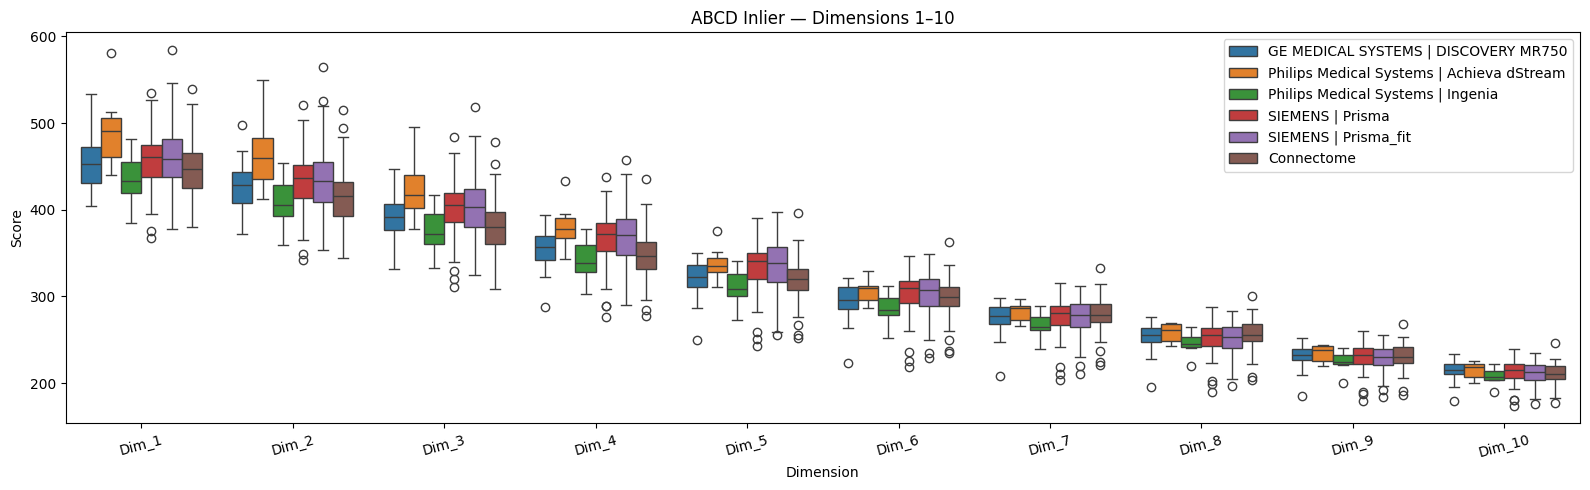

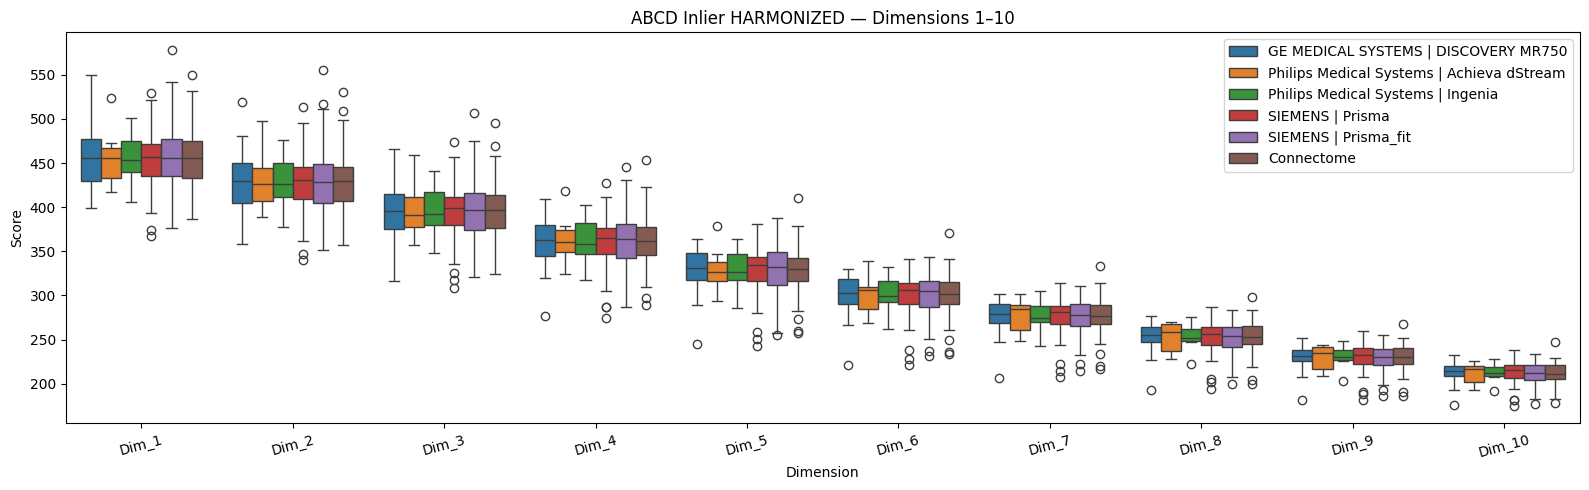

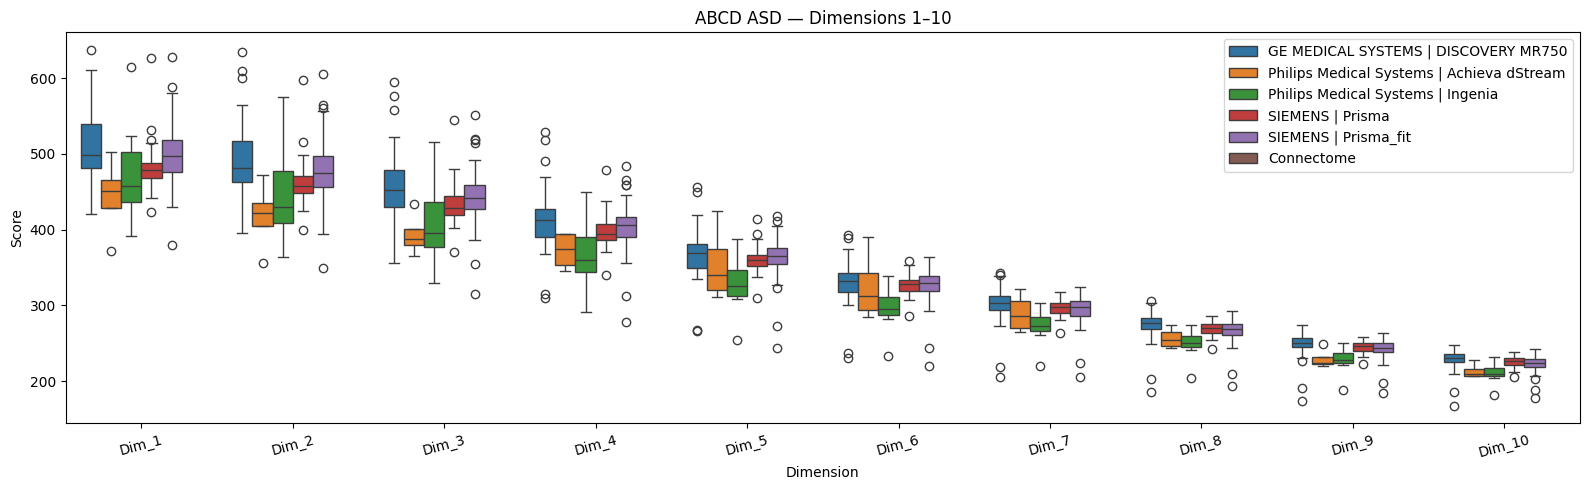

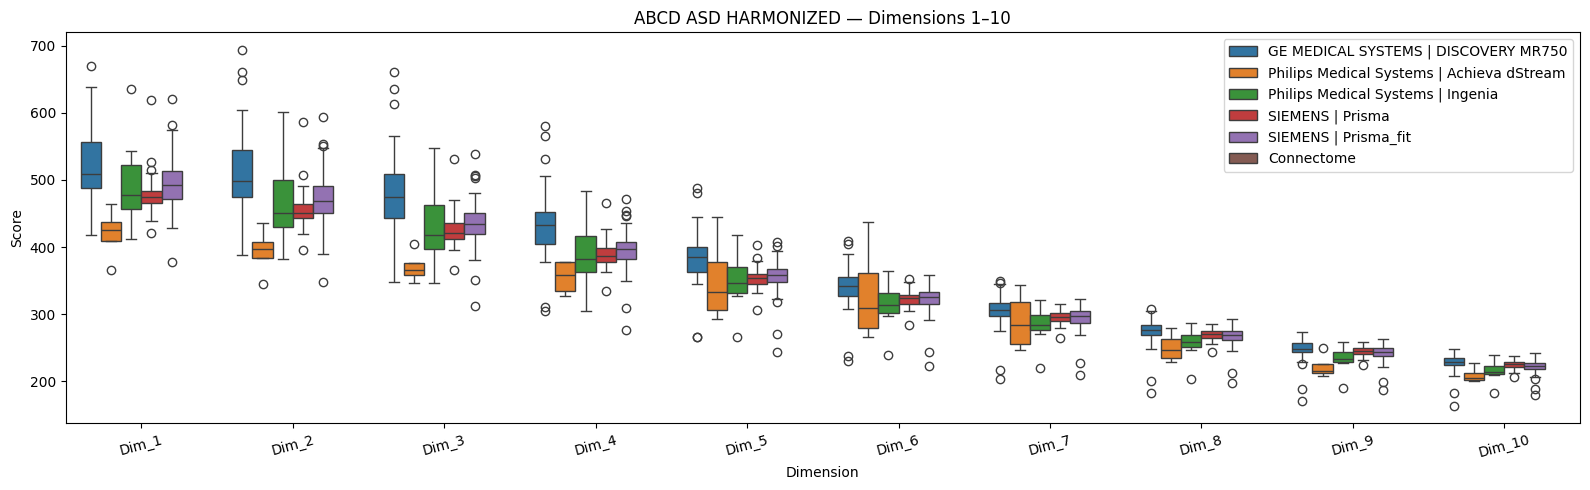

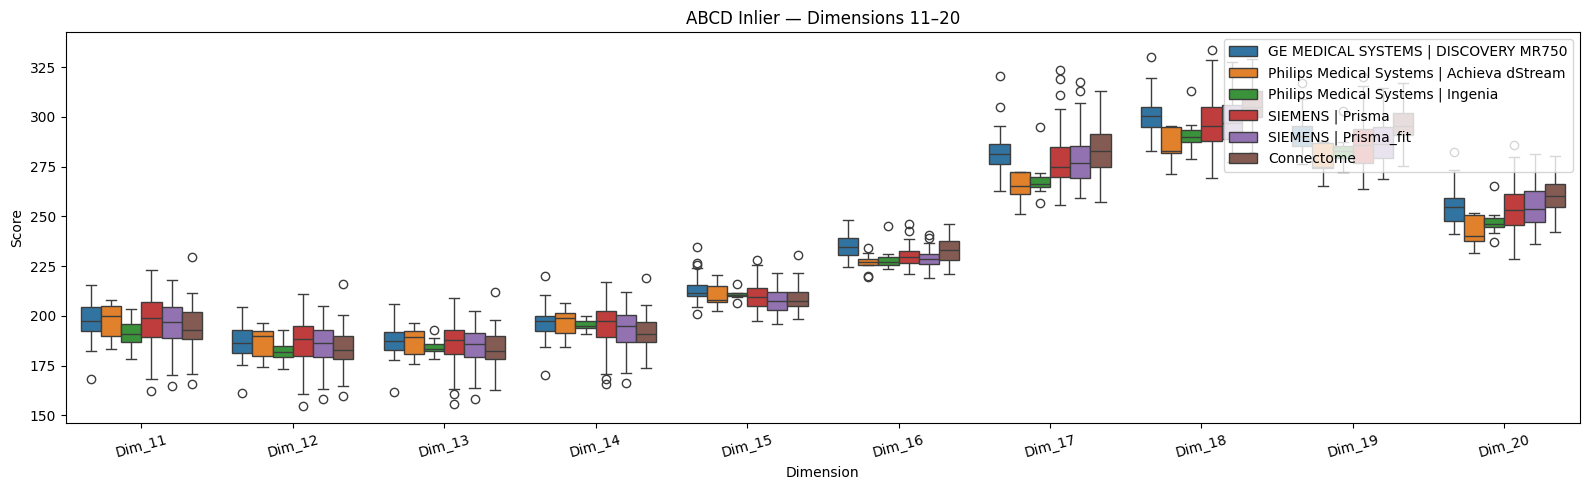

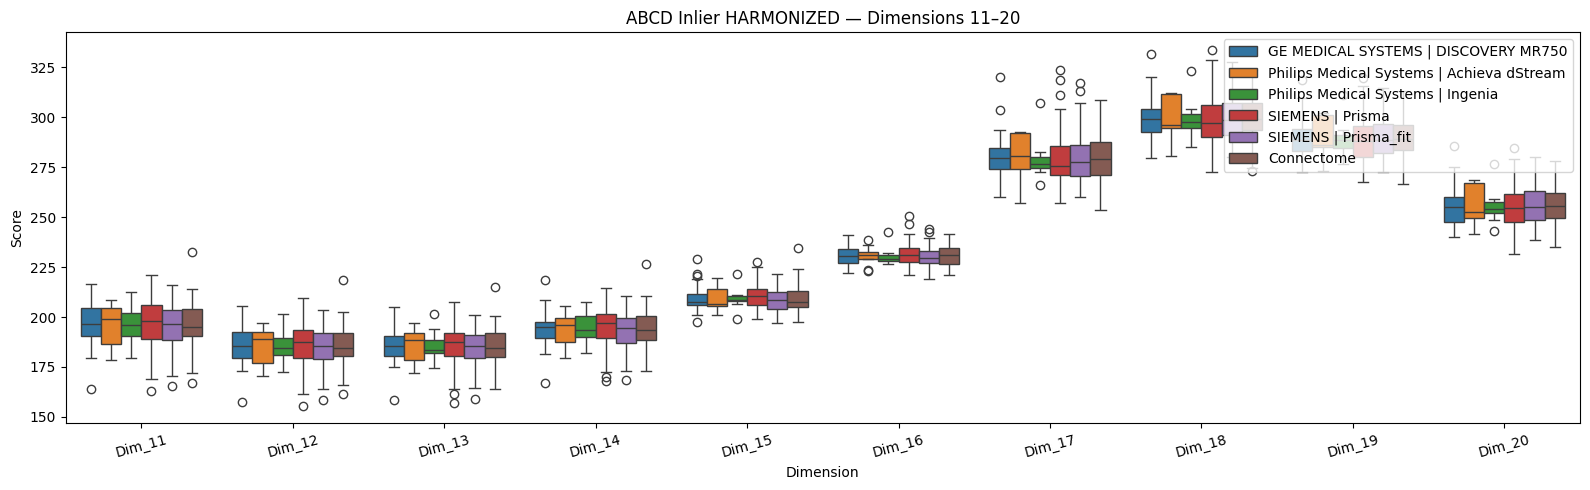

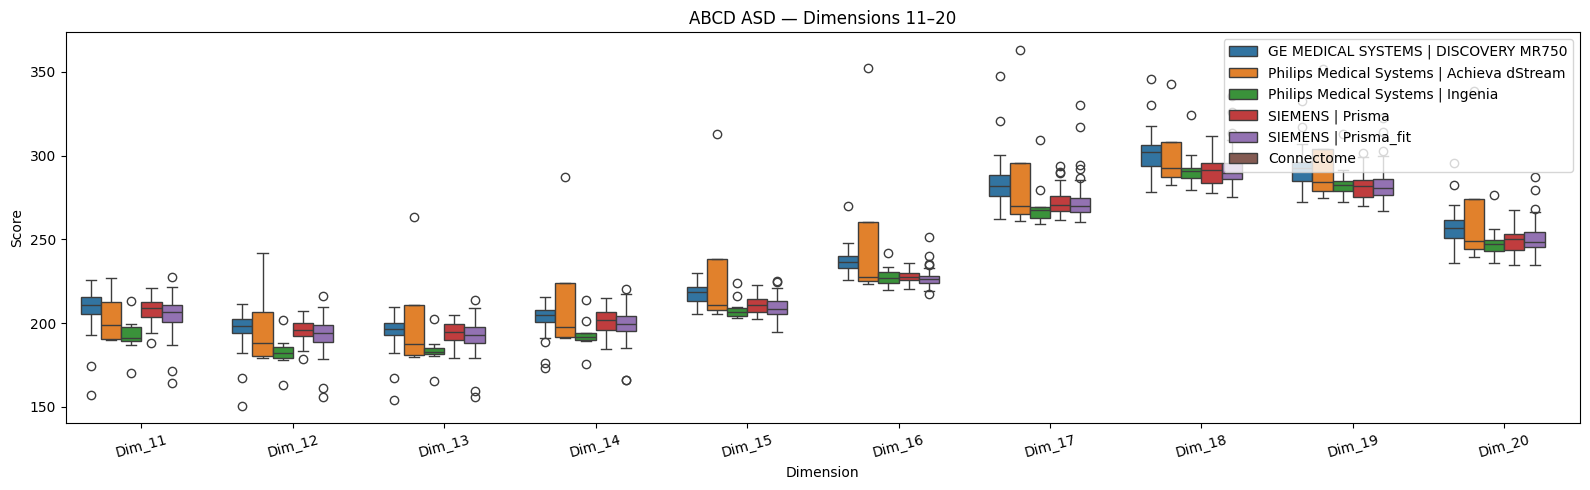

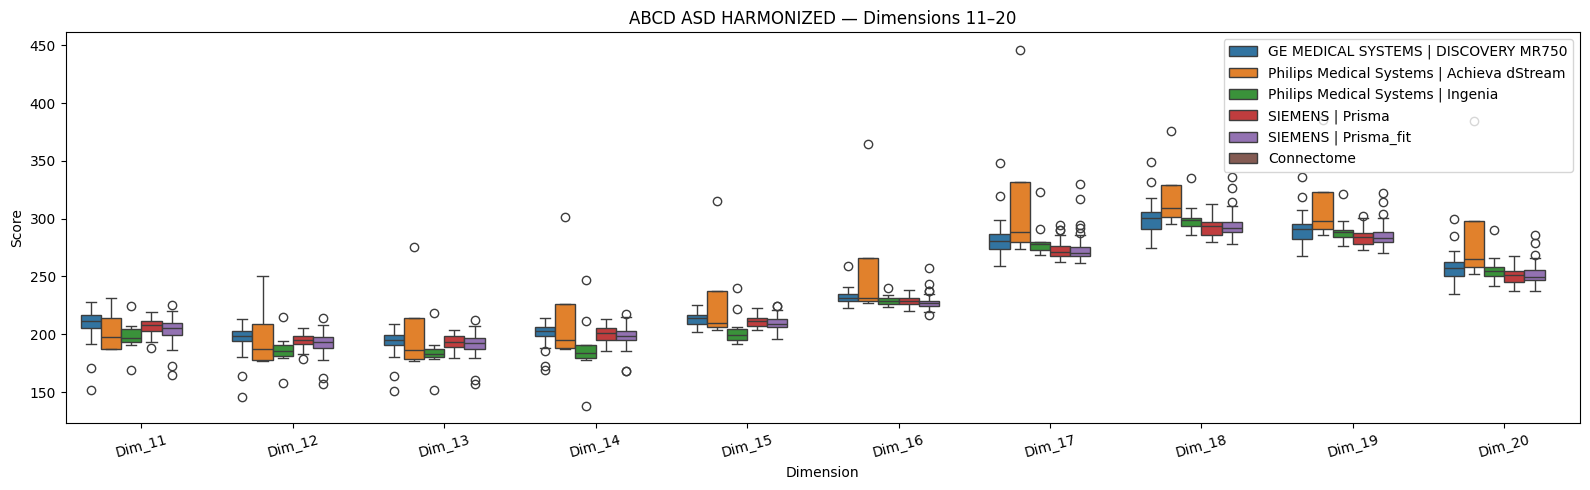

In [24]:
harmonized_long_abcd = make_long(harmonized_score_norms_abcd, scanner_names_abcd)
harmonized_long_asd  = make_long(harmonized_score_norms_abcd_asd, scanner_names_asd)

# 1. Define your fixed scanner order:
scanner_order = [
    'GE MEDICAL SYSTEMS | DISCOVERY MR750',
    'Philips Medical Systems | Achieva dStream',
    'Philips Medical Systems | Ingenia',
    'SIEMENS | Prisma',
    'SIEMENS | Prisma_fit',
    'Connectome'
]

# 2. Create a palette dict (one distinct color per scanner):
base_palette = sns.color_palette("tab10", n_colors=len(scanner_order))
palette_dict = dict(zip(scanner_order, base_palette))

# 3. Re–define your plotting helper to use hue_order & palette:
def plot_dims_1_10(long_df, title_prefix):
    """
    Boxplot of Dimensions 1–10 for the given long-form DataFrame.
    """
    dims = [f'Dim_{i}' for i in range(1, 11)]
    fig, ax = plt.subplots(figsize=(16, 5))
    sns.boxplot(
        data=long_df[long_df['Dimension'].isin(dims)],
        x='Dimension',
        y='Score',
        hue='Scanner',
        hue_order=scanner_order,
        palette=palette_dict,
        ax=ax
    )
    ax.set_title(f'{title_prefix} — Dimensions 1–10')
    ax.tick_params(axis='x', rotation=15)
    ax.legend(loc='upper right')
    plt.tight_layout()

def plot_dims_11_20(long_df, title_prefix):
    """
    Boxplot of Dimensions 11–20 for the given long-form DataFrame.
    """
    dims = [f'Dim_{i}' for i in range(11, 21)]
    fig, ax = plt.subplots(figsize=(16, 5))
    sns.boxplot(
        data=long_df[long_df['Dimension'].isin(dims)],
        x='Dimension',
        y='Score',
        hue='Scanner',
        hue_order=scanner_order,
        palette=palette_dict,
        ax=ax
    )
    ax.set_title(f'{title_prefix} — Dimensions 11–20')
    ax.tick_params(axis='x', rotation=15)
    ax.legend(loc='upper right')
    plt.tight_layout()

# 4. Plot separately for ABCD and ASD:
plot_dims_1_10(long_abcd, 'ABCD Inlier')
plot_dims_1_10(harmonized_long_abcd, 'ABCD Inlier HARMONIZED')
plot_dims_1_10(long_asd, 'ABCD ASD')
plot_dims_1_10(harmonized_long_asd, 'ABCD ASD HARMONIZED')


plot_dims_11_20(long_abcd, 'ABCD Inlier')
plot_dims_11_20(harmonized_long_abcd, 'ABCD Inlier HARMONIZED')
plot_dims_11_20(long_asd, 'ABCD ASD')
plot_dims_11_20(harmonized_long_asd, 'ABCD ASD HARMONIZED')
plt.show()

In [25]:
pd.Series(scanner_names_abcd).value_counts()

SIEMENS | Prisma_fit                         104
SIEMENS | Prisma                              96
Connectome                                    78
GE MEDICAL SYSTEMS | DISCOVERY MR750          35
Philips Medical Systems | Achieva dStream      9
Philips Medical Systems | Ingenia              8
Name: count, dtype: int64

In [26]:
pd.Series(scanner_names_asd).value_counts()

SIEMENS | Prisma_fit                         68
GE MEDICAL SYSTEMS | DISCOVERY MR750         47
SIEMENS | Prisma                             32
Philips Medical Systems | Ingenia            10
Philips Medical Systems | Achieva dStream     4
Name: count, dtype: int64

In [27]:
# UNCOMMENT BELOW TO SAVE THE HARMONIZED DATA
# np.save('data_scorenorm/harmonized_abcd.npy', harmonized_score_norms_abcd)
# np.save('data_scorenorm/harmonized_asd.npy',  harmonized_score_norms_abcd_asd)
score_norms_abcd = np.load('data_scorenorm/harmonized_abcd.npy')
score_norms_abcd_asd  = np.load('data_scorenorm/harmonized_asd.npy')

In [28]:
type(harmonized_score_norms_abcd_asd)

numpy.ndarray